## scikit-learn中的逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)

In [10]:
X=np.random.normal(0.,1.,size=(200,2))
y=np.array((X[:,0] ** 2 + X[:,1]) < 1.5,dtype=int)
for _ in range(20):
    y[np.random.randint(200)] = 1

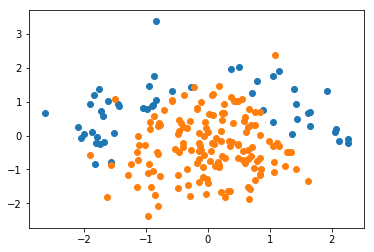

In [11]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [12]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [15]:
logi_reg = LogisticRegression()

In [16]:
logi_reg.fit(X_train,y_train)

/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
def plot_scatter():
    plt.scatter(X[y==0,0],X[y==0,1])
    plt.scatter(X[y==1,0],X[y==1,1])

/A/develop/ide/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


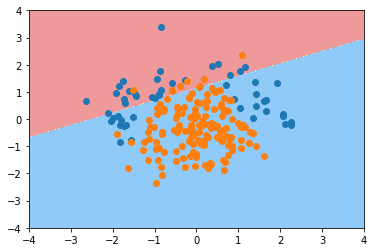

In [22]:
plot_decision_boundary(logi_reg,[-4, 4, -4, 4])
plot_scatter()
plt.show()

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [56]:
def poly_reg(degree):
    return Pipeline(
    [
        ('poly',PolynomialFeatures(degree=degree)),
        ('ss',StandardScaler()),
        ('pr',LogisticRegression())
    ])

In [57]:
def plog_poly_reg(X,y,degree):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    pr = poly_reg(degree)
    pr.fit(X_train,y_train)
    score = pr.score(X_test,y_test)
    print('score:',score)
    plot_decision_boundary(pr,[-4, 4, -4, 4])
    plot_scatter()
    plt.show()

/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/A/develop/ide/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


score: 0.92


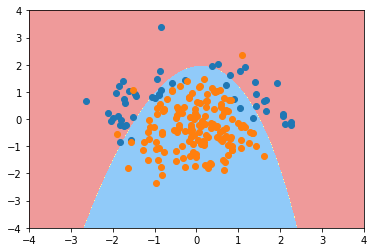

In [58]:
plog_poly_reg(X,y,2)

/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score: 1.0


/A/develop/ide/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


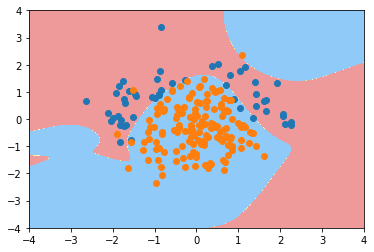

In [59]:
plog_poly_reg(X,y,20)

In [73]:
def poly_with_c(degree,C,penalty):
    return Pipeline(
    [
        ('pf',PolynomialFeatures(degree=degree)),
        ('ss',StandardScaler()),
        ('lr',LogisticRegression(C=C,penalty=penalty))
    ])

In [75]:
def poly_plot(degree,C,penalty):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    pwc = poly_with_c(degree,C,penalty=penalty)
    pwc.fit(X_train,y_train)
    score = pwc.score(X_test,y_test)
    print('score:',score)
    plot_decision_boundary(pwc,[-4, 4, -4, 4])
    plot_scatter()
    plt.show()

/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score: 0.98


/A/develop/ide/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


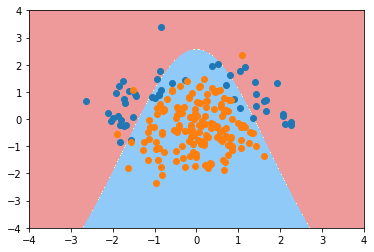

In [76]:
poly_plot(20,0.1,'l1')

/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score: 0.9


/A/develop/ide/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


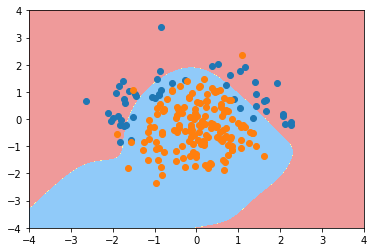

In [77]:
poly_plot(20,0.1,'l2')